# Introduction to neural network classification with tensorflow
Types:
* Binary
* Multiclass
* Multilabel

In [ ]:
#creating data to view and fit
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check out the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Let's visualize
import pandas as pd

circle = pd.DataFrame({"XO": x[:, 0], "X1" :x[:, 1], "label": y})
circle

,XO,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circle["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

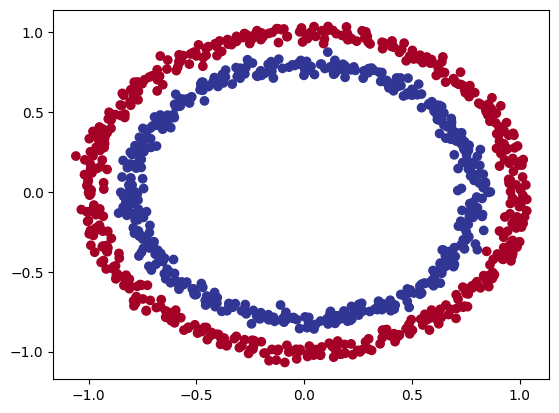

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Input and output shapes of neural networks
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
x.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
x[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

Steps in modelling
1. create or import a model
2. compile
3. Fit the model
4. evaluate
5. tweak
6. evaluate


In [ ]:
#import tensorflow

import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
#Set the random seed
tf.random.set_seed(42)

# 1. create the model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.6115 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.0831 - accuracy: 0.5130
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4980


In [ ]:
#Let's try improving our model by training it for longer
model.fit(x, y, epochs=200)
model.evaluate(x, y)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4970
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5110
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4580
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4640
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4910
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.4730
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4850
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4780
Epoch 11/

[0.6934831142425537, 0.5]

Since we are working on binary classification its getting around 50% accuracy.

So let's add an extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x, y) #loss is same and accuracy is 50

32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000


[0.6946721076965332, 0.5]

Improving the model(choose different optimization) or fit our model for more epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 3.5421 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2376 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7620 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7377 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7130 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4990


[0.6966644525527954, 0.49900001287460327]

In [ ]:
model_3.predict(x)

32/32 [==============================] - 0s 1ms/step


array([[0.46562132],
       [0.54319626],
       [0.54712737],
       [0.5446292 ],
       [0.43884608],
       [0.54858005],
       [0.52860224],
       [0.46147773],
       [0.47544795],
       [0.5427525 ],
       [0.51029104],
       [0.499085  ],
       [0.5352354 ],
       [0.44496343],
       [0.4422904 ],
       [0.4574213 ],
       [0.53372514],
       [0.46071592],
       [0.53673434],
       [0.5025233 ],
       [0.48083207],
       [0.5598146 ],
       [0.45974237],
       [0.46819848],
       [0.5630538 ],
       [0.5546223 ],
       [0.51937115],
       [0.44696692],
       [0.4537578 ],
       [0.4439491 ],
       [0.47895426],
       [0.54712397],
       [0.52666354],
       [0.44381225],
       [0.46063203],
       [0.5654784 ],
       [0.549233  ],
       [0.50054586],
       [0.4542556 ],
       [0.48188102],
       [0.49902177],
       [0.5137207 ],
       [0.5089185 ],
       [0.4431879 ],
       [0.51906526],
       [0.5320684 ],
       [0.44312105],
       [0.514

To visualize our models predictions lets create a function 'plot_decision_boundary()'
* take a trained model with x and y
* create a meshgrid of the different values of x
* make predictions across the meshgrid
* plot the predictions as well as a line between zones(where unique class falls)

In [ ]:
import numpy as np

In [ ]:

def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 1].max() + 0.1
  y_min, y_max = x[:, 0].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multi class classification")

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary class classifation")
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary class classifation


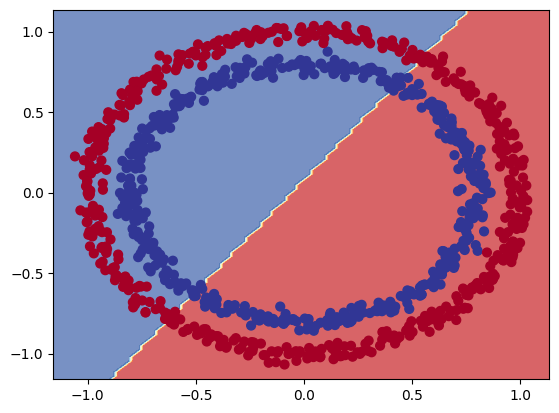

In [ ]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
# lets see if our model can be used for a regression problem

tf.random.set_seed(42)

x_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model_r = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_r.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
# model.fit(tf.expand_dims(x,axis=1),y,epochs=5)


model_r.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 665.0041 - mae: 665.0041
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 728.4065 - mae: 728.4065
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 696.6705 - mae: 696.6705
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 749.2773 - mae: 749.2773
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 608.9313 - mae: 608.9313
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 706.0715 - mae: 706.0715
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 701.7561 - mae: 701.7561
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 561.6479 - mae: 561.6479
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 874.2705 - mae: 874.2705
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 711.1553 - mae: 711.1553
Epoch 11/100
5/5 [=====================

In [ ]:
x_reg_train.ndim, y_reg_train.ndim, x_reg_train.dtype, y_reg_train.dtype

(1, 1, tf.int32, tf.int32)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#x_reg_train = tf.reshape(x_reg_train,(-1, 1))
model_3.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 466.7084 - mae: 466.7084
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 349.0476 - mae: 349.0476
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 234.7661 - mae: 234.7661
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 114.9292 - mae: 114.9292
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 53.0388 - mae: 53.0388
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 85.8613 - mae: 85.8613
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 67.4498 - mae: 67.4498
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 43.7074 - mae: 43.7074
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 49.5109 - mae: 49.5109
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 41.6687 - mae: 41.6687
Epoch 11/100
5/5 [==============================] -

In [ ]:
y_reg_predict = model_3.predict(x_reg_test)
print(y_reg_predict)

2/2 [==============================] - 0s 5ms/step
[[ 891.80304]
 [ 897.6928 ]
 [ 903.58264]
 [ 909.4721 ]
 [ 915.3618 ]
 [ 921.2516 ]
 [ 927.1413 ]
 [ 933.0309 ]
 [ 938.9206 ]
 [ 944.8104 ]
 [ 950.70013]
 [ 956.5898 ]
 [ 962.4793 ]
 [ 968.3691 ]
 [ 974.2588 ]
 [ 980.14844]
 [ 986.0381 ]
 [ 991.9279 ]
 [ 997.8175 ]
 [1003.70703]
 [1009.5968 ]
 [1015.48663]
 [1021.37634]
 [1027.266  ]
 [1033.1558 ]
 [1039.0454 ]
 [1044.935  ]
 [1050.8248 ]
 [1056.7145 ]
 [1062.604  ]
 [1068.4937 ]
 [1074.3834 ]
 [1080.2733 ]
 [1086.1628 ]
 [1092.0525 ]
 [1097.9423 ]
 [1103.8322 ]
 [1109.7217 ]
 [1115.6113 ]
 [1121.5011 ]
 [1127.3906 ]
 [1133.2803 ]
 [1139.17   ]
 [1145.0597 ]
 [1150.9492 ]
 [1156.839  ]
 [1162.7289 ]
 [1168.6184 ]
 [1174.508  ]
 [1180.3977 ]]


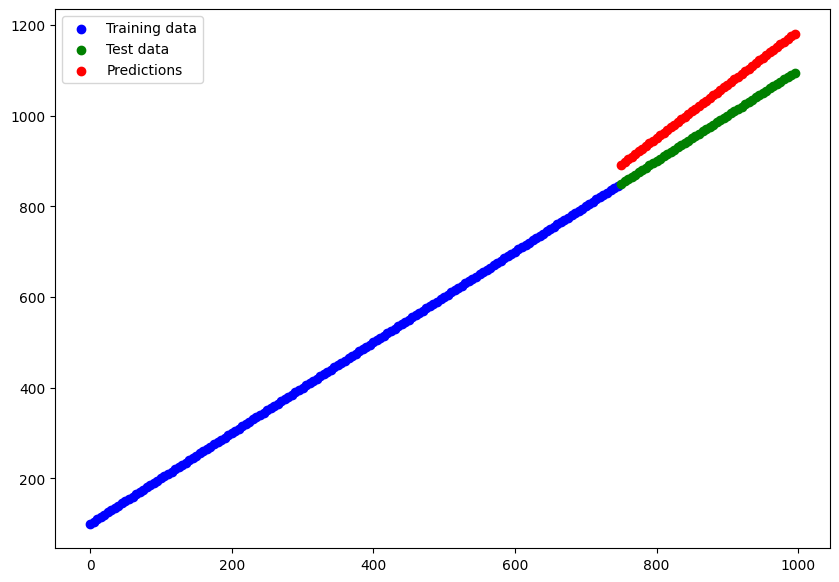

In [ ]:
#plot and evaluate

plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(x_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(x_reg_test, y_reg_predict, c='r', label="Predictions")
plt.legend();

The missing piece : Non Linearity

In [ ]:
tf.random.set_seed(42)

# creata a model
model_4 = tf.keras.Sequential([
   tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#compile a model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3259 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2021 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1595 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1232 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0636 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9089 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7772 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6344 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5832 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5498 - accuracy: 0.4750
Epoch 11/

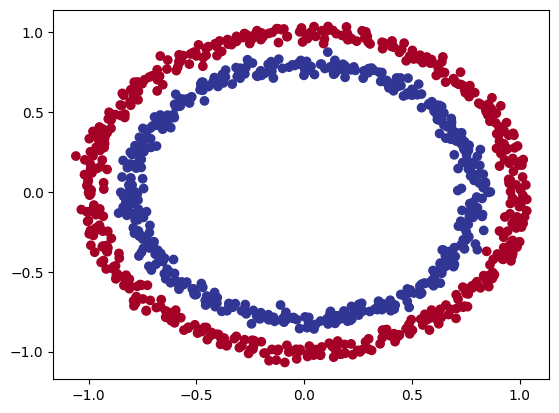

In [ ]:
# visualize

plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#check the decision boundary for our latest model

plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

202/313 [==================>...........] - ETA: 0s

Let's try build our neural network with a non linear activation function

In [ ]:
tf.random.set_seed(42)

# creata a model
model_5 = tf.keras.Sequential([
   tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#compile a model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#fit the model
history = model_5.fit(x, y, epochs=100)

In [ ]:
# trying multi layered neural network

tf.random.set_seed(42)

# creata a model
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation='relu'),
   tf.keras.layers.Dense(10, activation='relu'),
   tf.keras.layers.Dense(1, activation='relu')
])

#compile a model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#fit the model
history = model_6.fit(x, y, epochs=250)

In [ ]:
model_6.evaluate(x, y)

In [ ]:
#visulaize

plot_decision_boundary(model_6, x, y)

In [ ]:

tf.random.set_seed(42)

# creata a model
model_7 = tf.keras.Sequential([
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile a model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#fit the model
history = model_7.fit(x, y, epochs=100)

In [ ]:
model_7.evaluate(x, y)

In [ ]:
plot_decision_boundary(model_7, x, y)

In [ ]:
# create a toy tensor

a = tf.cast(tf.range(-10, 10), tf.float32)
a

In [ ]:
plt.plot(a)

In [ ]:
# applying sigmoid activation directly
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use sigmoid of a
sigmoid(a)

In [ ]:
plt.plot(sigmoid(a))

In [ ]:
# creating relu function
def relu(x):
  return tf.maximum(0, x)

relu(a)

In [ ]:
plt.plot(relu(a))

In [ ]:
# linear activation function

tf.keras.activations.linear(a)

In [ ]:
plt.plot(tf.keras.activations.linear(a))

In [ ]:
a == tf.keras.activations.linear(a)

Evauating and improving our classification

In [ ]:
len(x)

In [ ]:
x, y

In [ ]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
tf.random.set_seed(42)

# create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

#compile the model
model_8.compile(loss='binary_crossentropy',
           optimizer=tf.keras.optimizers.Adam(lr=0.01),
           metrics=['accuracy'])

# fit the model
history = model_8.fit(x_train, y_train, epochs=100)

In [ ]:
# evaluate
model_8.evaluate(x_test, y_test)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

In [ ]:
history.history

plot the loss


In [ ]:
#converty history to dataframe
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('model_8 loss curves')

The loss function going down means the model is improving

Finding the best learning rate

* A learning rate "callback"
* Another model
* A modified loss curve

In [ ]:
tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

#compile the model
model_9.compile(loss='binary_crossentropy',
           optimizer='Adam',
           metrics=['accuracy'])

#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_9 = model_9.fit(x_train, y_train, epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6986 - accuracy: 0.5163 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5150 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5188 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5175 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5213 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.5188 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

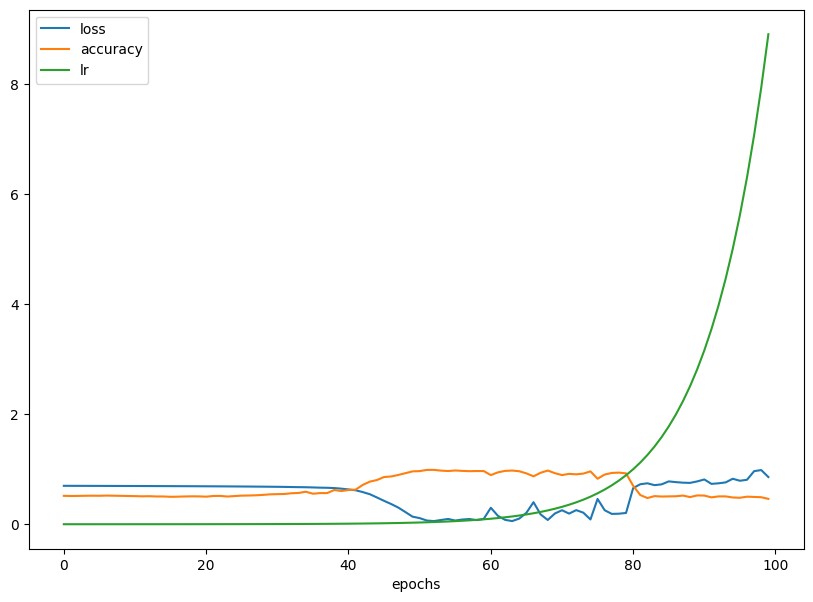

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'learning rate vs loss')

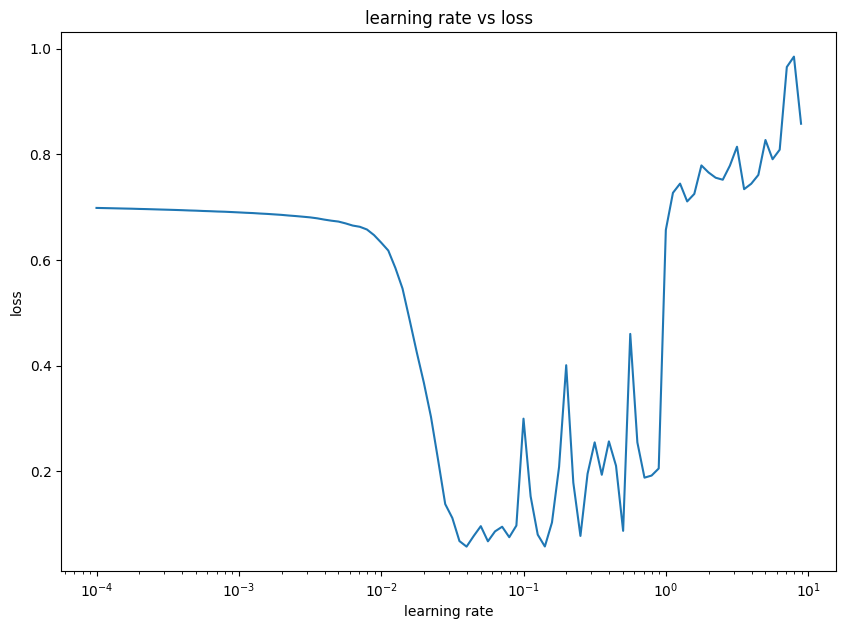

In [ ]:
# plt the learning rate versus Loss

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [ ]:
#model with ideal learning rate
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

#compile the model
model_10.compile(loss='binary_crossentropy',
           optimizer=tf.keras.optimizers.Adam(0.02),
           metrics=['accuracy'])

# fit the model
history_10 = model_10.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5288
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6087
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5725
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6162
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6463
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6575
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.6850
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.6925
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7063
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7150
Epoch 11/25
25/25 [

In [ ]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7450


[0.5231981873512268, 0.7450000047683716]

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.5300


[0.662814736366272, 0.5299999713897705]

313/313 [==============================] - 0s 1ms/step
doing binary class classifation
313/313 [==============================] - 1s 2ms/step
doing binary class classifation


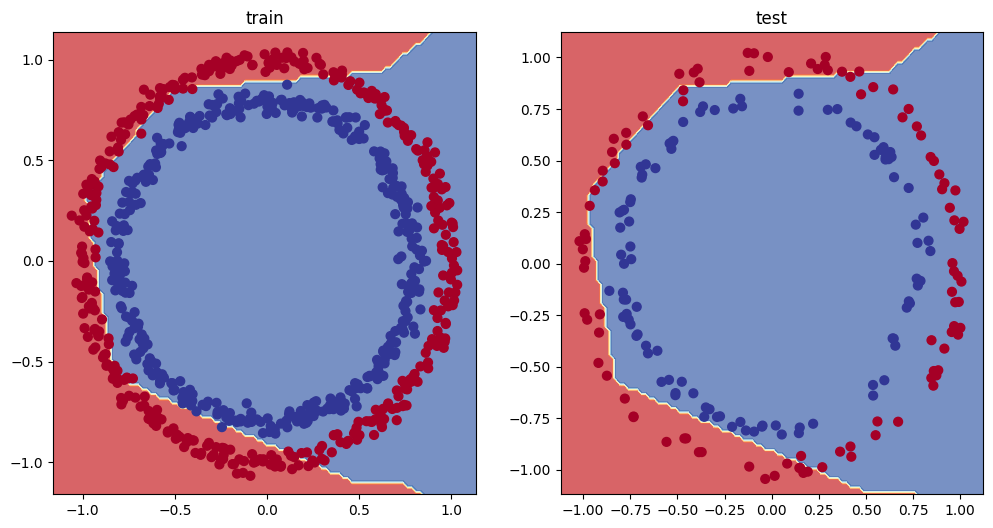

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show()

More classification evaluation methods
* Accuracy
* precision
* recall
* F1 score
* confusion matrix
* classification report(scikit learn)

In [ ]:
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"model loss on test set: {loss}")
print(f"model accuracy on test data: {(accuracy*100) :.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7450
model loss on test set: 0.5231981873512268
model accuracy on test data: 74.50%


In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

#confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
y_test, y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0]),
 array([[0.6954486 ],
        [0.6954486 ],
        [0.6954486 ],
        [0.6954486 ],
        [0.6954486 ],
        [0.27046886],
        [0.6954486 ],
        [0.11822917],
        [0.6954486 ],
        [0.6954486 ]], dtype=float32))

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[50, 51],
       [ 0, 99]])

Working with a larger example (multiclass classification)

* This means if you have moore than 2 classes it is multiclass classification.

To practice multiclass classification, we are going to build a neural network to classify images of different items of clothing.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data as already been sorted into training aand testing dara.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

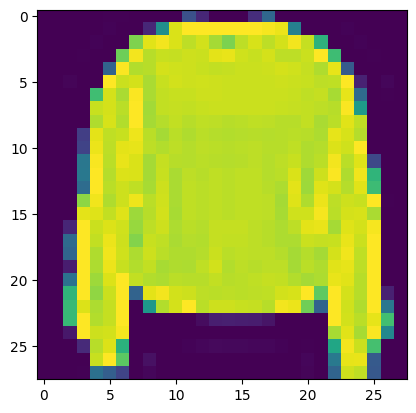

In [ ]:
# plot
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so the are readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",	"Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

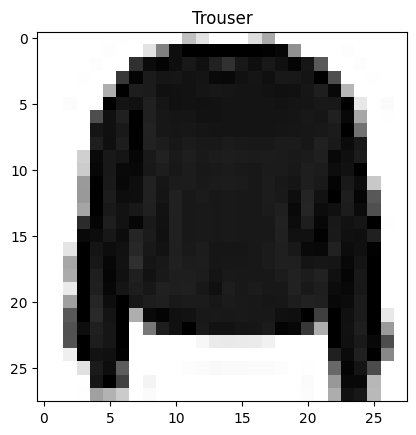

In [ ]:
#plot an example image and its label
index_of_choice = 1000
plt.imshow(train_data[7], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

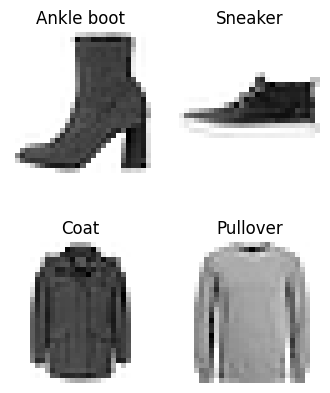

In [ ]:
#plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(4, 5))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Building a multi-class classification model
* input_shape 28 x 28(shape of one image)
* output_shape = 10(one per class of clothing

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
# our data needs to be flattened (from 28*28 to none, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
tf.one_hot(train_labels[:10], depth=10) #So we are using sparse categorical cross entropy if they are not on hot encoded and are integer form

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.7029 - accuracy: 0.0988 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3031 - accuracy: 0.0985 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3037 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3037 - val_accuracy: